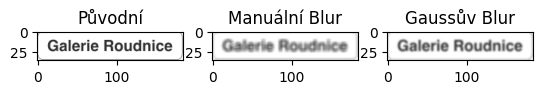

Čas pro manuální průměrování: 0.06431722640991211 sekund
Čas pro Gaussův blur: 0.005242824554443359 sekund


In [2]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

def manual_blur(image, kernel_size):
    h, w = image.shape[:2]
    padded_image = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)
    blurred_image = np.zeros_like(image)
    
    for i in range(h):
        for j in range(w):
            roi = padded_image[i:i+kernel_size, j:j+kernel_size]
            blurred_image[i, j] = np.mean(roi, axis=(0, 1))
    
    return blurred_image

# Načtení obrázku
image = cv2.imread('../assets/logo-roudnice.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definování velikosti matice
n = 5  # Velikost jádra

# Měření času pro manuální průměrování
start_time = time.time()
manual_blurred_image = manual_blur(image, n)
manual_time = time.time() - start_time

# Měření času pro Gaussův blur
start_time = time.time()
gaussian_blurred_image = cv2.GaussianBlur(image, (n, n), 0)
gaussian_time = time.time() - start_time

# Zobrazení výsledků
plt.subplot(1, 3, 1), plt.imshow(image), plt.title('Původní')
plt.subplot(1, 3, 2), plt.imshow(manual_blurred_image), plt.title('Manuální Blur')
plt.subplot(1, 3, 3), plt.imshow(gaussian_blurred_image), plt.title('Gaussův Blur')
plt.show()

# Tisk časů
print(f"Čas pro manuální průměrování: {manual_time} sekund")
print(f"Čas pro Gaussův blur: {gaussian_time} sekund")


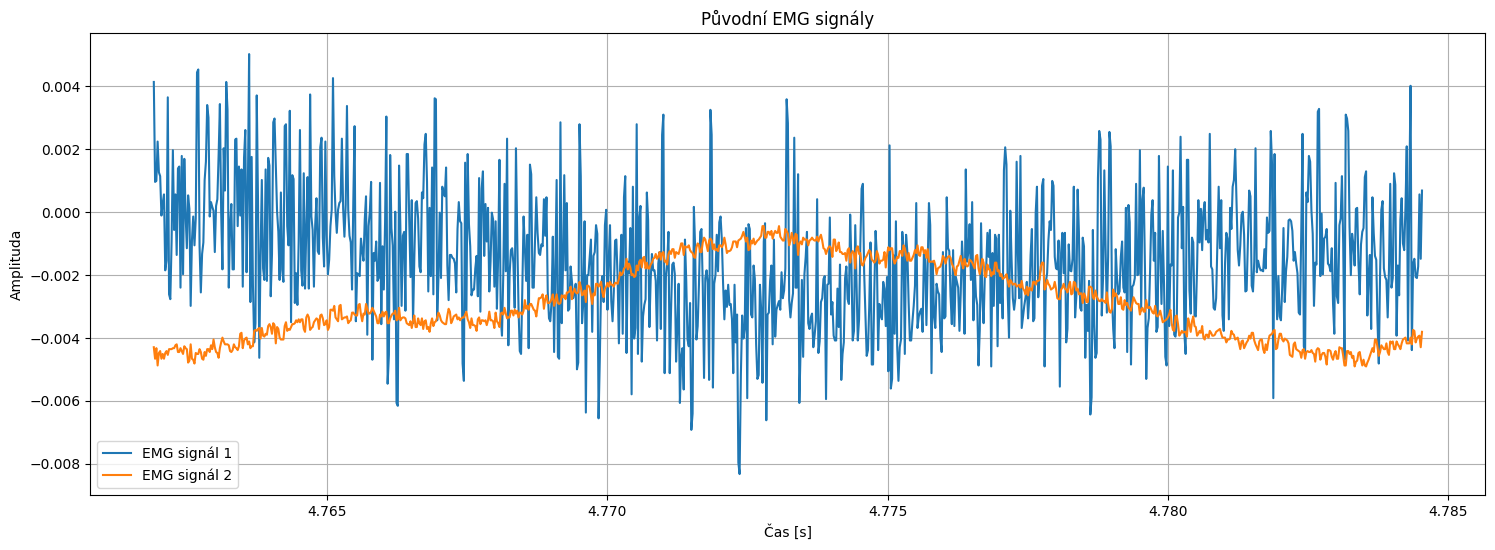

4.866861702361851e-05


ValueError: x and y must have same first dimension, but have shapes (999,) and (1,)

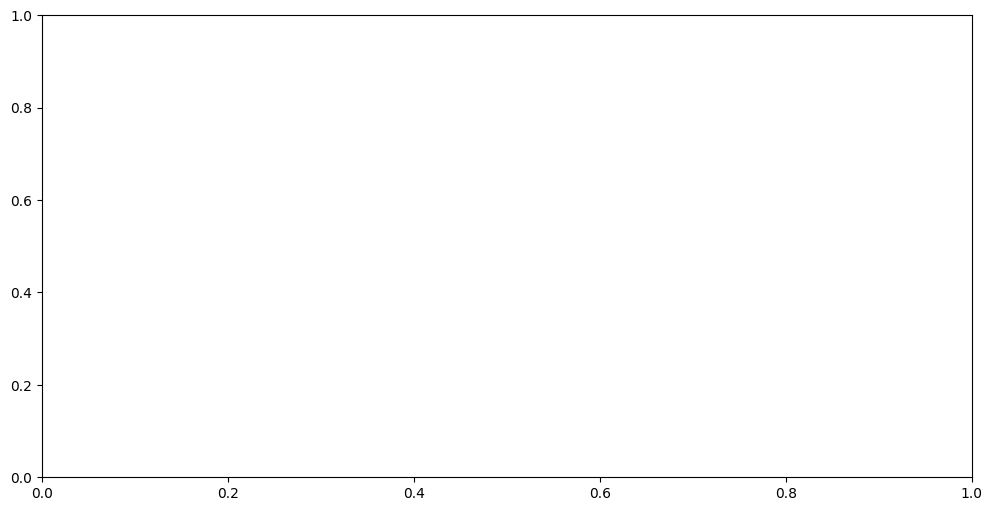

In [14]:
import matplotlib.pyplot as plt
from numpy import dtype, floating, ndarray
from numpy._typing import _64Bit
from typing import Any

# Načtení dat ze souboru EMG.txt
data: ndarray[Any, dtype[floating[_64Bit]]] = np.loadtxt('../assets/EMG.txt')

# Extrahujeme časové razítko a hodnoty EMG signálu
time: ndarray[Any, dtype[floating[_64Bit]]] = data[:, 0]
emg1: ndarray[Any, dtype[floating[_64Bit]]] = data[:, 1]
emg2: ndarray[Any, dtype[floating[_64Bit]]] = data[:, 2]

# Vykreslení původního EMG signálu
plt.figure(figsize=(18, 6))
plt.plot(time, emg1, label='EMG signál 1')
plt.plot(time, emg2, label='EMG signál 2')
plt.title('Původní EMG signály')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()


# Výpočet iEMG
iemg1 = np.trapz(np.abs(emg1), time)
iemg2 = np.trapz(np.abs(emg2), time)

print(iemg1)

plt.figure(figsize=(12, 6))
plt.plot(time, iemg1, label='EMG signál 1')




# # Výpočet absolutní hodnoty EMG signálu
# abs_emg1 = np.abs(emg1)
# abs_emg2 = np.abs(emg2)

# # Výpočet integrovaného EMG (iEMG)
# iEMG1 = np.cumsum(abs_emg1)
# iEMG2 = np.cumsum(abs_emg2)

# # Vykreslení iEMG signálů
# plt.figure(figsize=(12, 6))
# plt.plot(time, iEMG1, label='iEMG signál 1')
# plt.plot(time, iEMG2, label='iEMG signál 2')
# plt.title('Integrovaný EMG (iEMG)')
# plt.xlabel('Čas [s]')
# plt.ylabel('iEMG')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Detekce oblastí s nárůstem a poklesem aktivity (například na základě derivace)
# window_size = 20
# diff_iEMG1 = np.diff(iEMG1, prepend=0)
# diff_iEMG2 = np.diff(iEMG2, prepend=0)

# # Vykreslení derivací iEMG signálů
# plt.figure(figsize=(12, 6))
# plt.plot(time, diff_iEMG1, label='Derivace iEMG signál 1')
# plt.plot(time, diff_iEMG2, label='Derivace iEMG signál 2')
# plt.title('Derivace iEMG')
# plt.xlabel('Čas [s]')
# plt.ylabel('Derivace iEMG')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Detekce nárůstů a poklesů aktivity (příklad)
# threshold = 0.05  # nastavit odpovídající práh
# increasing_activity1 = diff_iEMG1 > threshold
# decreasing_activity1 = diff_iEMG1 < -threshold
# increasing_activity2 = diff_iEMG2 > threshold
# decreasing_activity2 = diff_iEMG2 < -threshold

# # Vykreslení grafu s detekcí nárůstů a poklesů aktivity
# plt.figure(figsize=(12, 6))
# plt.plot(time, iEMG1, label='iEMG signál 1')
# plt.plot(time, iEMG2, label='iEMG signál 2')
# plt.plot(time[increasing_activity1], iEMG1[increasing_activity1], 'g.', label='Nárůst aktivity signál 1')
# plt.plot(time[decreasing_activity1], iEMG1[decreasing_activity1], 'r.', label='Pokles aktivity signál 1')
# plt.plot(time[increasing_activity2], iEMG2[increasing_activity2], 'c.', label='Nárůst aktivity signál 2')
# plt.plot(time[decreasing_activity2], iEMG2[decreasing_activity2], 'm.', label='Pokles aktivity signál 2')
# plt.title('Detekce nárůstů a poklesů aktivity')
# plt.xlabel('Čas [s]')
# plt.ylabel('iEMG')
# plt.legend()
# plt.grid(True)
# plt.show()


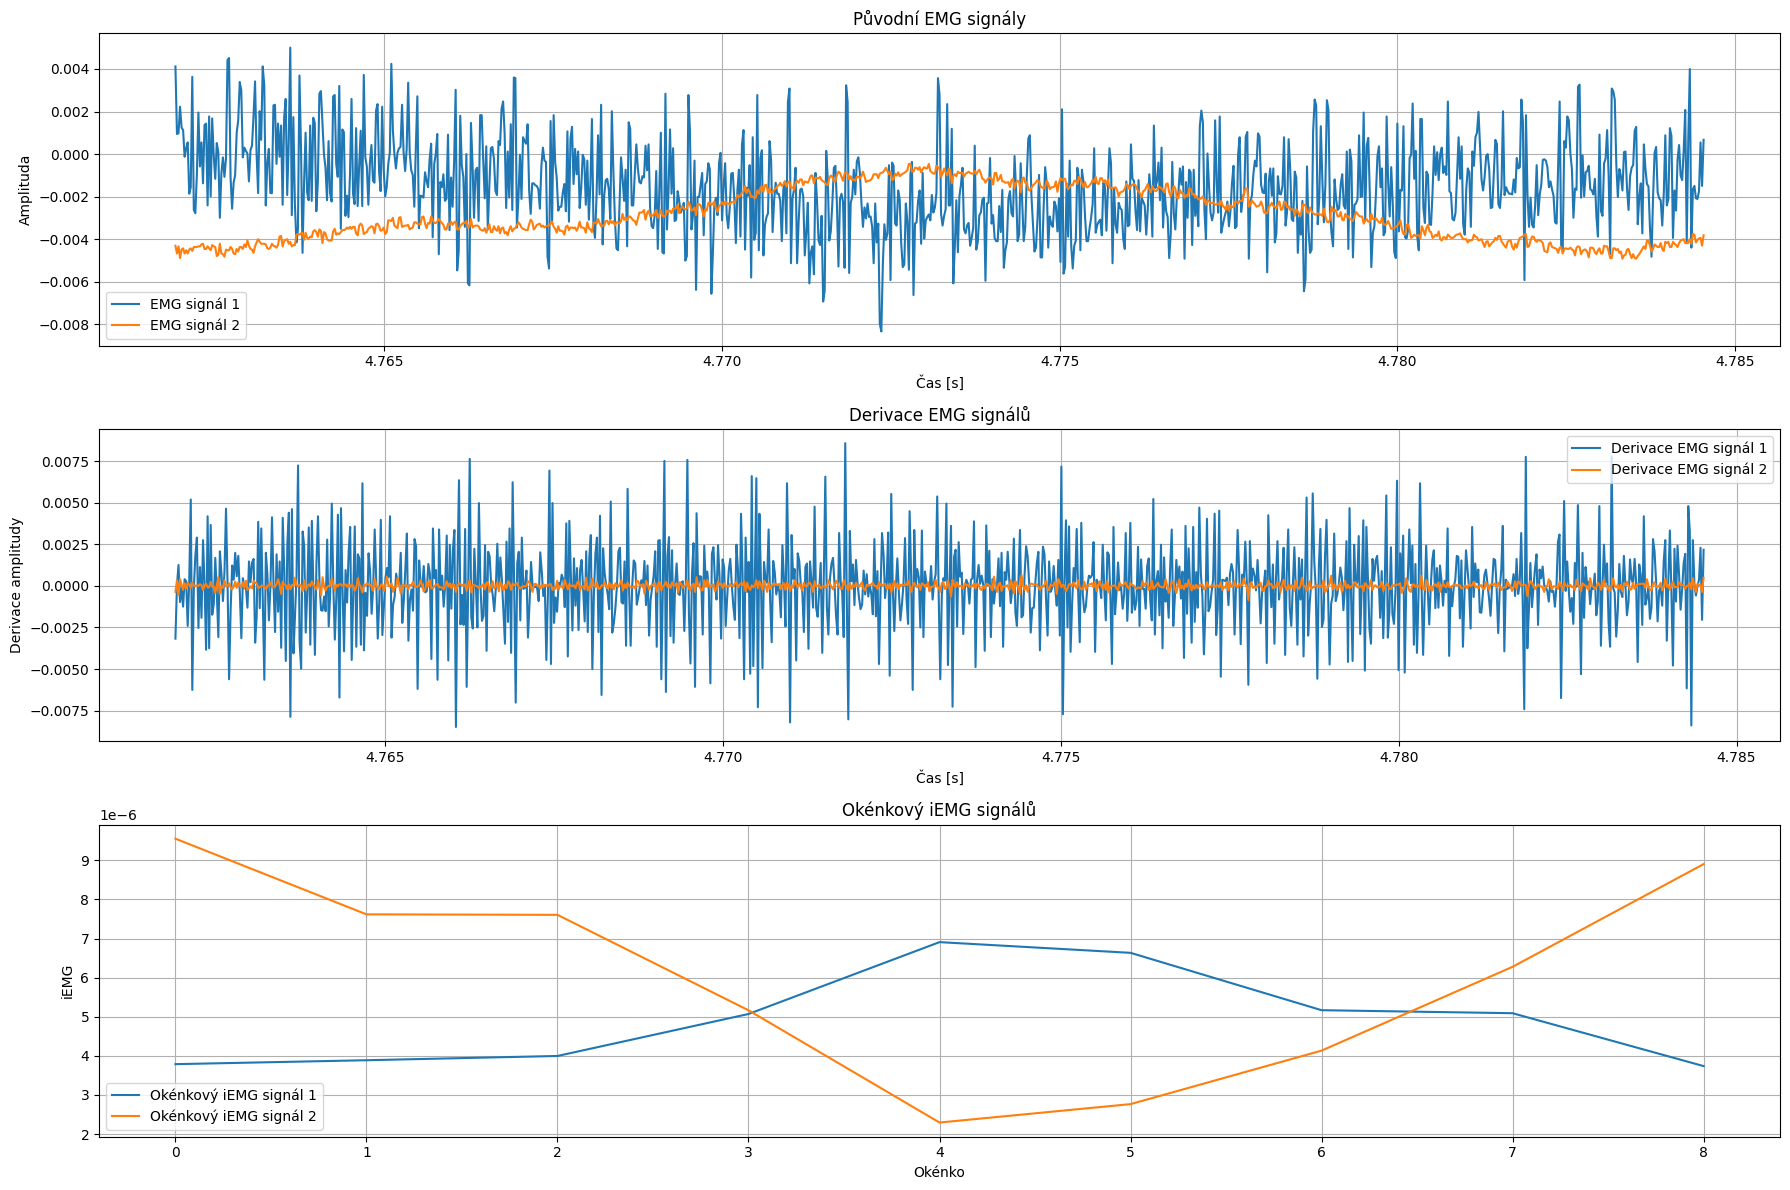

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Any

# Načtení dat ze souboru EMG.txt
data = np.loadtxt('../assets/EMG.txt')

# Extrahujeme časové razítko a hodnoty EMG signálu
time = data[:, 0]
emg1 = data[:, 1]
emg2 = data[:, 2]

# Výpočet iEMG
iemg1 = np.trapz(np.abs(emg1), time)
iemg2 = np.trapz(np.abs(emg2), time)


# Funkce pro výpočet okénkového iEMG
def windowed_iemg(signal, time, window_size):
    num_windows = len(signal) // window_size
    windowed_iemg_values = []
    for i in range(num_windows):
        start = i * window_size
        end = start + window_size
        window_iemg = np.trapz(np.abs(signal[start:end]), time[start:end])
        windowed_iemg_values.append(window_iemg)
    return np.array(windowed_iemg_values)

# Definujeme velikost okénka
window_size = 100

# Výpočet okénkového iEMG pro oba signály
windowed_iemg1 = windowed_iemg(emg1, time, window_size)
windowed_iemg2 = windowed_iemg(emg2, time, window_size)

# Výpočet derivace pro detekci nárůstu a poklesu aktivity
derivative1 = np.diff(emg1)
derivative2 = np.diff(emg2)

# Vykreslení výsledků
plt.figure(figsize=(18, 12))


# načtení dat ze souboru EMG.txt
plt.subplot(3, 1, 1)
plt.plot(time, emg1, label='EMG signál 1')
plt.plot(time, emg2, label='EMG signál 2')
plt.title('Původní EMG signály')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time[:-1], derivative1, label='Derivace EMG signál 1')
plt.plot(time[:-1], derivative2, label='Derivace EMG signál 2')
plt.title('Derivace EMG signálů')
plt.xlabel('Čas [s]')
plt.ylabel('Derivace amplitudy')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(range(len(windowed_iemg1)), windowed_iemg1, label='Okénkový iEMG signál 1')
plt.plot(range(len(windowed_iemg2)), windowed_iemg2, label='Okénkový iEMG signál 2')
plt.title('Okénkový iEMG signálů')
plt.xlabel('Okénko')
plt.ylabel('iEMG')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


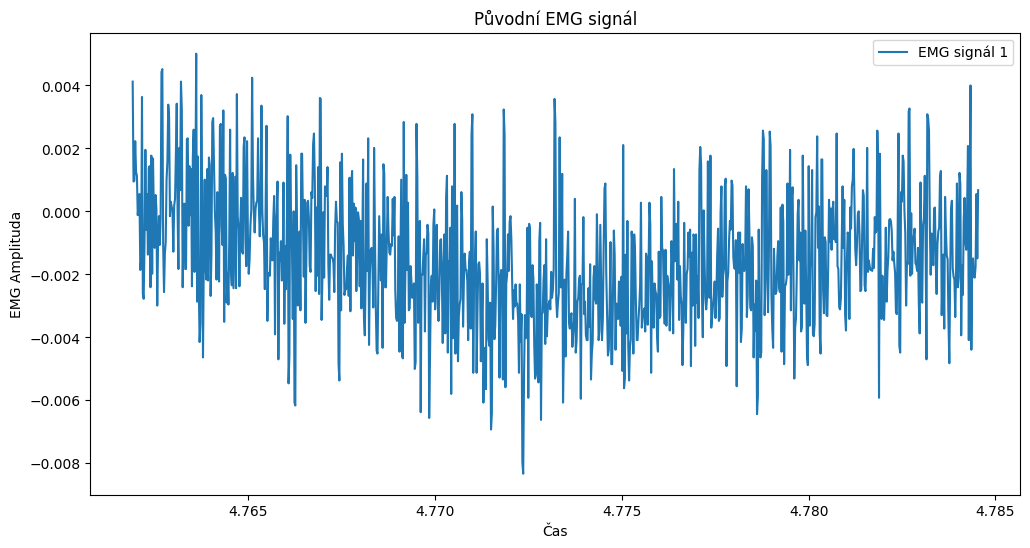

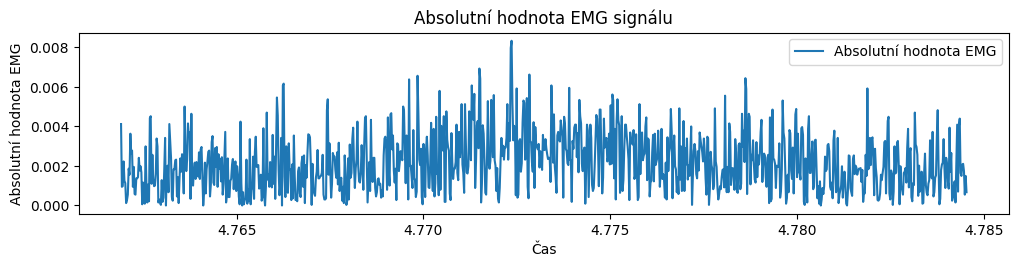

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Načtení dat ze souboru
emg_data = np.loadtxt('../assets/EMG.txt')

time = emg_data[:, 0]
emg1 = emg_data[:, 1]
emg2 = emg_data[:, 2]

# Zobrazení původního EMG signálu
plt.figure(figsize=(12, 6))
plt.plot(time, emg1, label='EMG signál 1')
plt.title('Původní EMG signál')
plt.xlabel('Čas')
plt.ylabel('EMG Amplituda')
plt.legend()
plt.show()

# Výpočet absolutní hodnoty EMG signálu
abs_emg = np.abs(emg1)

# Výpočet iEMG pomocí kumulativního součtu (numerická integrace)
iemg = np.cumsum(abs_emg) * (time[1] - time[0])  # Předpoklad rovnoměrného časového rozestupu

# Zobrazení absolutní hodnoty EMG signálu a iEMG
plt.figure(figsize=(12, 8))

# Absolutní hodnota EMG signálu
plt.subplot(3, 1, 1)
plt.plot(time, abs_emg, label='Absolutní hodnota EMG')
plt.title('Absolutní hodnota EMG signálu')
plt.xlabel('Čas')
plt.ylabel('Absolutní hodnota EMG')
plt.legend()





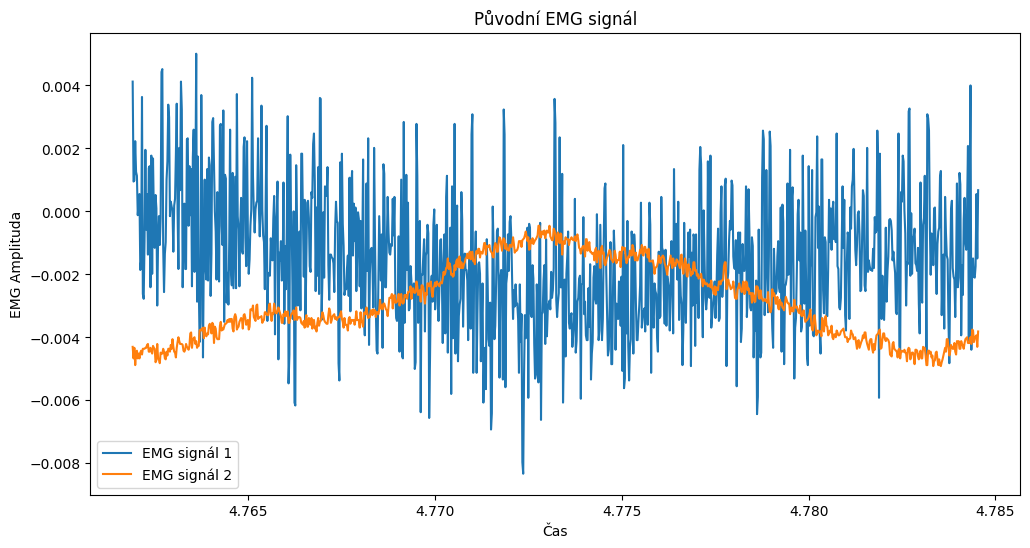

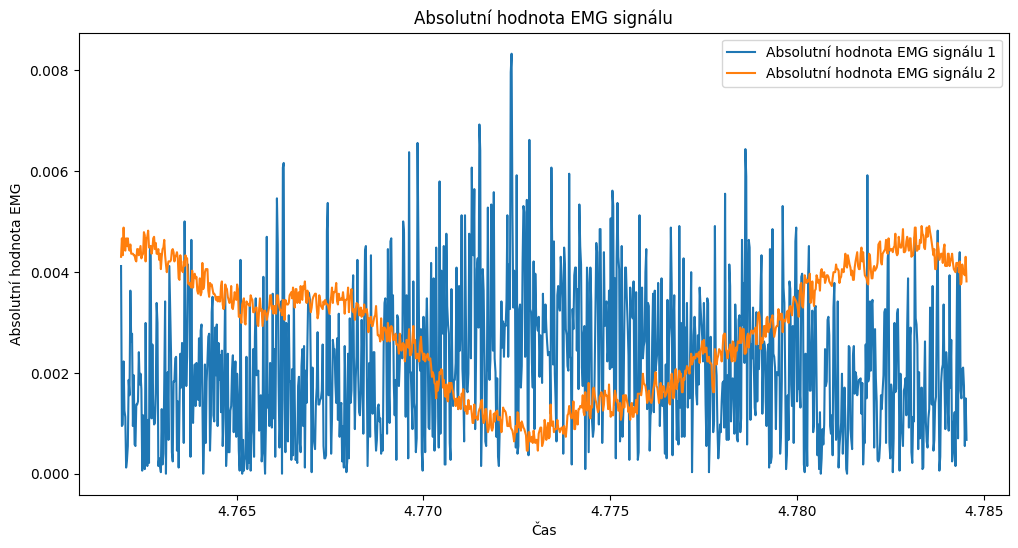

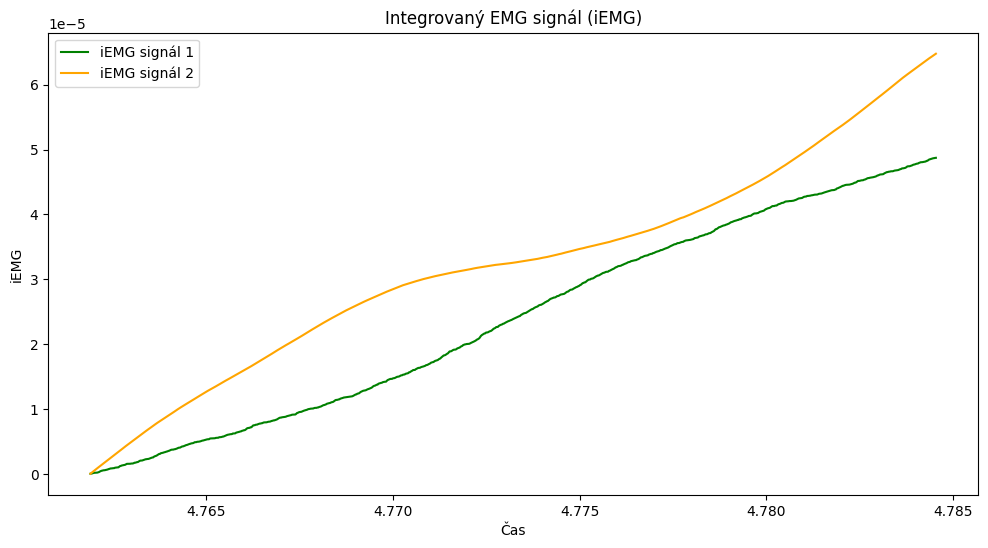

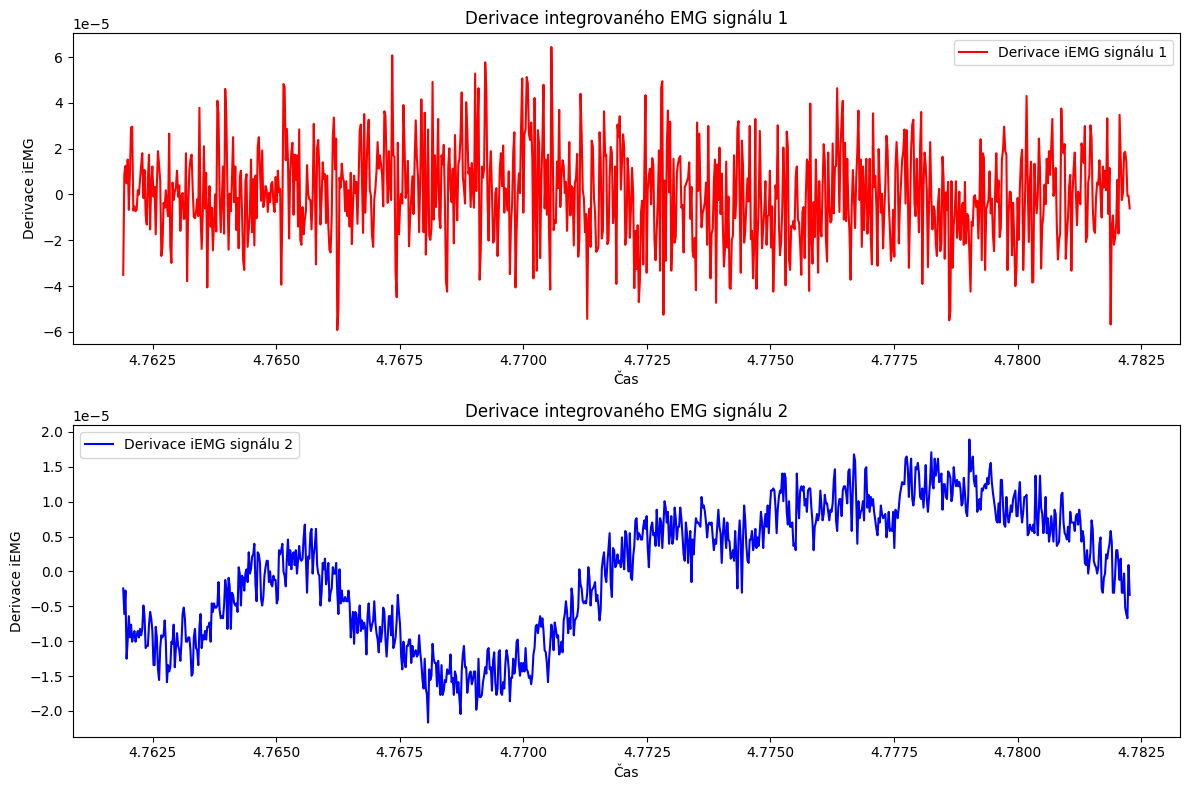

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Načtení dat ze souboru
emg_data = np.loadtxt('../assets/EMG.txt')

time = emg_data[:, 0]
emg1 = emg_data[:, 1]
emg2 = emg_data[:, 2]

# Zobrazení původního EMG signálu
plt.figure(figsize=(12, 6))
plt.plot(time, emg1, label='EMG signál 1')
plt.plot(time, emg2, label='EMG signál 2')
plt.title('Původní EMG signál')
plt.xlabel('Čas')
plt.ylabel('EMG Amplituda')
plt.legend()
plt.show()


# Výpočet absolutní hodnoty EMG signálu
abs_emg1 = np.abs(emg1)
abs_emg2 = np.abs(emg2)

# Zobrazení absolutní hodnoty EMG signálu
plt.figure(figsize=(12, 6))
plt.plot(time, abs_emg1, label='Absolutní hodnota EMG signálu 1')
plt.plot(time, abs_emg2, label='Absolutní hodnota EMG signálu 2')
plt.title('Absolutní hodnota EMG signálu')
plt.xlabel('Čas')
plt.ylabel('Absolutní hodnota EMG')
plt.legend()
plt.show()


# Výpočet iEMG pomocí kumulativního součtu (numerická integrace)
iemg1 = np.cumsum(abs_emg1) * (time[1] - time[0])
iemg2 = np.cumsum(abs_emg2) * (time[1] - time[0])

# Zobrazení iEMG
plt.figure(figsize=(12, 6))
plt.plot(time, iemg1, label='iEMG signál 1', color='green')
plt.plot(time, iemg2, label='iEMG signál 2', color='orange')
plt.title('Integrovaný EMG signál (iEMG)')
plt.xlabel('Čas')
plt.ylabel('iEMG')
plt.legend()
plt.show()


# Detekce oblastí se změnou aktivity pomocí okénkové varianty iEMG a derivace
window_size = 100  # Velikost okénka, můžete upravit dle potřeby

# Konvoluce pro okénkový průměr iEMG
iemg1_window = np.convolve(abs_emg1, np.ones(window_size)/window_size, mode='valid')
iemg2_window = np.convolve(abs_emg2, np.ones(window_size)/window_size, mode='valid')

# Derivace okénkového iEMG
derivative_iemg1 = np.diff(iemg1_window)
derivative_iemg2 = np.diff(iemg2_window)

# Přidání času pro odvozené signály
time_window = time[:len(iemg1_window)]
time_derivative = time[:len(derivative_iemg1)]

# Zobrazení derivace iEMG
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time_derivative, derivative_iemg1, label='Derivace iEMG signálu 1', color='red')
plt.title('Derivace integrovaného EMG signálu 1')
plt.xlabel('Čas')
plt.ylabel('Derivace iEMG')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_derivative, derivative_iemg2, label='Derivace iEMG signálu 2', color='blue')
plt.title('Derivace integrovaného EMG signálu 2')
plt.xlabel('Čas')
plt.ylabel('Derivace iEMG')
plt.legend()

plt.tight_layout()
plt.show()







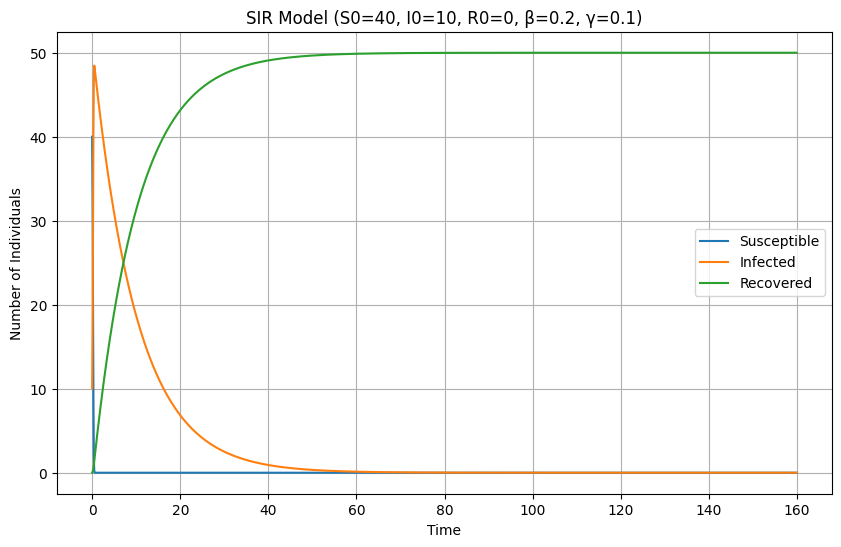

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Eulerova metoda pro SIR model
def euler_sir(S0, I0, R0, beta, gamma, N, dt, T):
    t = np.arange(0, T, dt)
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for i in range(1, len(t)):
        dS = -beta * S[i-1] * I[i-1] * dt
        dI = (beta * S[i-1] * I[i-1] - gamma * I[i-1]) * dt
        dR = gamma * I[i-1] * dt
        
        S[i] = S[i-1] + dS
        I[i] = I[i-1] + dI
        R[i] = R[i-1] + dR
        
    return t, S, I, R

# Parametry
N = 50
S0 = 40
I0 = 10
R0 = 0
beta = 0.2
gamma = 0.1
T = 160
dt = 0.1

# Výpočet
t, S, I, R = euler_sir(S0, I0, R0, beta, gamma, N, dt, T)

# Grafický výstup
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title(f'SIR Model (S0={S0}, I0={I0}, R0={R0}, β={beta}, γ={gamma})')
plt.legend()
plt.grid(True)
plt.show()


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

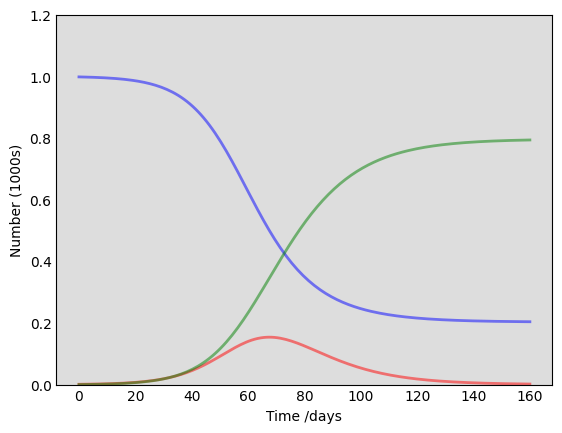

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()